For this project, I first tried using AI, and then switched to modifying the code of another person. The original code can be found at the following URL: https://www.kaggle.com/code/vijayaadithyanvg/car-price-prediction-used-cars

## 🚨🚨 PLEASE DO NOT RUN THIS PROGRAM UNLESS YOU HAVE A MINIMUM OF 32GB OF RAM 🚨🚨
### Any less and your system may crash!

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np

In [4]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "cars.csv"

# Load the latest version
download = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "abdulrahmankhaled1/1983-2020-used-cars",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

download.to_csv('original_cars.csv')

C:\Users\yalts\AppData\Local\Temp\ipykernel_31312\2614026481.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  download = kagglehub.load_dataset(


In [5]:
car_df = pd.read_csv('cars.csv')

# Extract brand from name column
car_df.insert(0, "make", car_df['name'].apply(lambda x: x.split()[0]))
car_df.insert(1, "model", car_df['name'].apply(lambda x: " ".join(x.split()[1:])))
car_df = car_df.drop(columns='name', axis=1)
car_df['selling_price'] = car_df['selling_price'].multiply(0.012)
#This converts the prices from Ruppees to USD
make = car_df['make'].unique()
make_dict = {}
for i in range(len(make)):
    make_dict[make[i]] = i
print(make_dict)
car_df['make'] = car_df['make'].map(make_dict)
car_df.sort_values(by='selling_price', ascending=False)

{'Maruti': 0, 'Skoda': 1, 'Honda': 2, 'Hyundai': 3, 'Toyota': 4, 'Ford': 5, 'Renault': 6, 'Mahindra': 7, 'Tata': 8, 'Chevrolet': 9, 'Fiat': 10, 'Datsun': 11, 'Jeep': 12, 'Mercedes-Benz': 13, 'Mitsubishi': 14, 'Audi': 15, 'Volkswagen': 16, 'BMW': 17, 'Nissan': 18, 'Lexus': 19, 'Jaguar': 20, 'Land': 21, 'MG': 22, 'Volvo': 23, 'Daewoo': 24, 'Kia': 25, 'Force': 26, 'Ambassador': 27, 'Ashok': 28, 'Isuzu': 29, 'Opel': 30, 'Peugeot': 31}


,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,23,XC90 T8 Excellence BSIV,2017,120000.000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400.00,640Nm@ 1740rpm,4.0
2938,17,X7 xDrive 30d DPE,2020,86400.000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993.0,265.00,620Nm@ 1500-2500rpm,7.0
4952,15,A6 35 TFSI Matrix,2019,78276.000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0
4950,15,A6 35 TFSI Matrix,2019,74676.000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0
7713,13,S-Class S 350 CDI,2017,72000.000,37000,Diesel,Dealer,Automatic,First Owner,13.5,2987.0,254.79,620Nm@ 1600-2400rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,0,800 Std,2004,378.048,110000,Petrol,Individual,Manual,Third Owner,16.1,796.0,37.00,59Nm@ 2500rpm,4.0
5965,0,800 Std,2000,372.000,56194,Petrol,Individual,Manual,Fourth & Above Owner,16.1,796.0,37.00,59Nm@ 2500rpm,4.0
6776,3,Santro GLS I - Euro I,2000,360.000,90000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
2145,0,Zen LXI,2001,360.000,10000,Petrol,Individual,Manual,First Owner,17.3,993.0,60.00,78Nm@ 4500rpm,5.0


In [6]:
car_df.shape
#rows, then columns

(8128, 14)

In [7]:
car_df.isnull().sum()

make               0
model              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
torque           222
seats            221
dtype: int64

For this analysis, I don't really care about the columns with missing data, so I don't need to drop those records.

In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   make           8128 non-null   int64  
 1   model          8128 non-null   object 
 2   year           8128 non-null   int64  
 3   selling_price  8128 non-null   float64
 4   km_driven      8128 non-null   int64  
 5   fuel           8128 non-null   object 
 6   seller_type    8128 non-null   object 
 7   transmission   8128 non-null   object 
 8   owner          8128 non-null   object 
 9   mileage        7907 non-null   object 
 10  engine         7907 non-null   float64
 11  max_power      7912 non-null   float64
 12  torque         7906 non-null   object 
 13  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 889.1+ KB


In [9]:
print(car_df.selling_price.value_counts())

selling_price
3600.000    227
7200.000    213
4200.000    209
6600.000    204
5400.000    195
           ... 
2435.988      1
6492.000      1
3048.000      1
6336.000      1
1224.000      1
Name: count, Length: 677, dtype: int64


In [10]:
categories = ['make',
            'fuel',
            'seller_type',
            'transmission',
            'owner'
            ]
for category in categories:
    category_dict = {}
    c = car_df[category].unique()
    print(f"Number of unique values in {category}: {len(c)}")
    for i in range(len(c)):
        category_dict[c[i]] = i
    car_df[category] = car_df[category].map(category_dict)
car_df.sort_values(by='selling_price', ascending=False)

Number of unique values in make: 32
Number of unique values in fuel: 4
Number of unique values in seller_type: 3
Number of unique values in transmission: 2
Number of unique values in owner: 5


,make,model,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
170,23,XC90 T8 Excellence BSIV,2017,120000.000,30000,1,0,1,0,42.0,1969.0,400.00,640Nm@ 1740rpm,4.0
2938,17,X7 xDrive 30d DPE,2020,86400.000,5000,0,0,1,0,13.38,2993.0,265.00,620Nm@ 1500-2500rpm,7.0
4952,15,A6 35 TFSI Matrix,2019,78276.000,23600,1,1,1,4,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0
4950,15,A6 35 TFSI Matrix,2019,74676.000,7800,1,1,1,4,15.26,1798.0,187.74,320Nm@ 1400-4100rpm,5.0
7713,13,S-Class S 350 CDI,2017,72000.000,37000,0,1,1,0,13.5,2987.0,254.79,620Nm@ 1600-2400rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,0,800 Std,2004,378.048,110000,1,0,0,2,16.1,796.0,37.00,59Nm@ 2500rpm,4.0
5965,0,800 Std,2000,372.000,56194,1,0,0,3,16.1,796.0,37.00,59Nm@ 2500rpm,4.0
6776,3,Santro GLS I - Euro I,2000,360.000,90000,1,0,0,2,NaN,NaN,NaN,NaN,NaN
2145,0,Zen LXI,2001,360.000,10000,1,0,0,0,17.3,993.0,60.00,78Nm@ 4500rpm,5.0


In [11]:
z_scores = np.abs(stats.zscore(car_df['selling_price'])) # Get rid of outliers to normalize data
car_df = car_df[(z_scores < 3)]
car_df = car_df.dropna()
car_df = car_df.reset_index(drop=True)

In [99]:
y = car_df['selling_price']


"""
Inclusion of features, by feature:
'make', included
'year', included
'selling_price', included
'km_driven', included
'fuel', included
'seller_type', included
'transmission', included
'owner', included
'mileage', removed, uncleanable as units as different for different fuel types
           and completely incomparable for the purposes of data analysis
'engine', included, cleaned
'max_power', included, cleaned
'torque', removed, uncleanable in a reasonable period of time
'seats' included
]"""


#torque cannot be cleaned, removing from dataset

features = ['make',
            'year',
            'km_driven',
            'fuel',
            'seller_type',
            'transmission',
            'owner',
            'engine',
            'max_power',
            'seats']

X = car_df[features]

X.dropna()

X.drop_duplicates()

print(features)

print(X.shape)

X

['make', 'year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'engine', 'max_power', 'seats']
(7677, 10)


,make,year,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats
0,0,2014,145500,0,0,0,0,1248.0,74.00,5.0
1,1,2014,120000,0,0,0,1,1498.0,103.52,5.0
2,2,2006,140000,1,0,0,2,1497.0,78.00,5.0
3,3,2010,127000,0,0,0,0,1396.0,90.00,5.0
4,0,2007,120000,1,0,0,0,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...
7672,3,2013,110000,1,0,0,0,1197.0,82.85,5.0
7673,3,2007,119000,0,0,0,3,1493.0,110.00,5.0
7674,0,2009,120000,0,0,0,0,1248.0,73.90,5.0
7675,8,2013,25000,0,0,0,0,1396.0,70.00,5.0


# Heads-up!
## The section below can take in excess of 4 minutes to run. It will also use many, *many* gigabytes of RAM. If you have less than 32GB, STOP IT HERE!

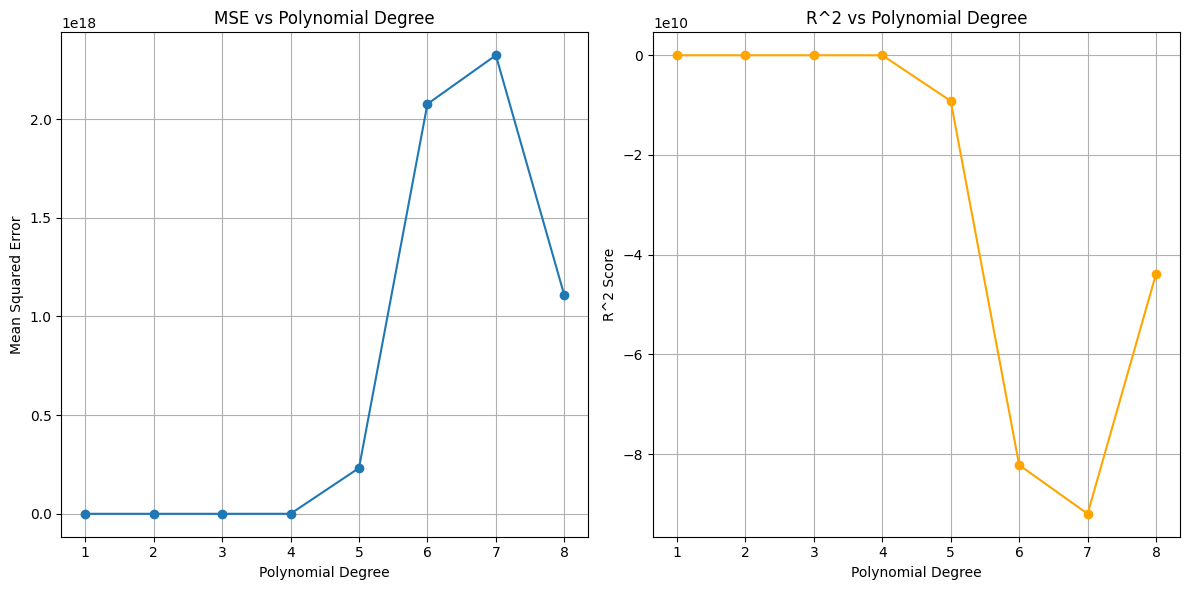

Best degree based on MSE: 3
Best degree based on R^2: 3


In [13]:
# Evaluate polynomial regression for degrees 1 through 8
degrees = range(1, 9)
mse_list = []
r2_list = []

for degree in degrees:
    # Transform features with PolynomialFeatures #iterates on power of the features (squared? cubed?)
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_transform = poly.fit_transform(X)
    
    # Apply StandardScaler for feature scaling #Scales data so that it is on a similar scale
    scaler = StandardScaler()
    X_transform = scaler.fit_transform(X_transform)
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42) #Supervised learning for validating the model's performance
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_test_actual = y_test
    y_pred_actual = y_pred
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred_actual)
    r2 = r2_score(y_test, y_pred_actual)
    mse_list.append(mse)
    r2_list.append(r2)

# Plot MSE and R^2 for each degree
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_list, marker='o', label='MSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Polynomial Degree')
plt.grid(True)

# Plot R^2
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_list, marker='o', label='R^2', color='orange')
plt.xlabel('Polynomial Degree')
plt.ylabel('R^2 Score')
plt.title('R^2 vs Polynomial Degree')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print the best degree based on MSE and R^2
best_degree_mse = degrees[np.argmin(mse_list)]
best_degree_r2 = degrees[np.argmax(r2_list)]
print(f"Best degree based on MSE: {best_degree_mse}")
print(f"Best degree based on R^2: {best_degree_r2}")

# Train the final model with the best degree
best_degree = best_degree_r2  # or best_degree_mse based on your preference


Final Model RMSE: 1520.66
Final Model R^2: 0.91


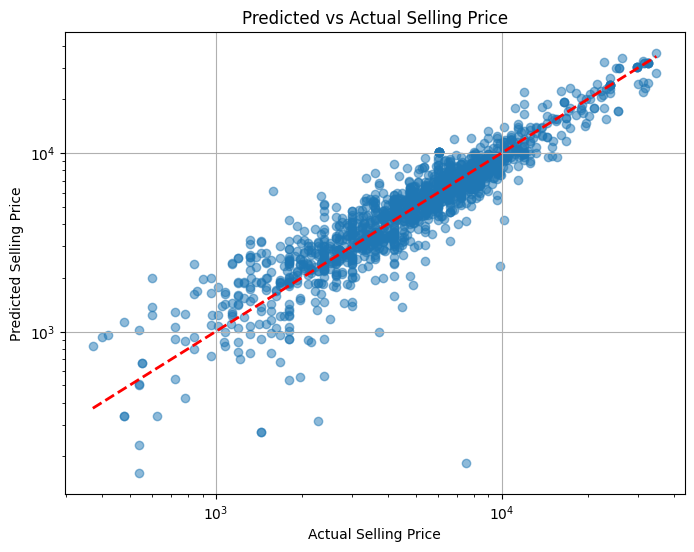

In [62]:
poly = PolynomialFeatures(degree=best_degree, include_bias=False)
X_transform = poly.fit_transform(X)
X_transform = scaler.fit_transform(X_transform)
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.2, random_state=42)
#Apparently 42 is convention literally just because of Hitchhiker's Guide to the Galaxy, and I find that hilarious
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = sqrt((mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)
print(f"Final Model RMSE: {rmse:.2f}")
print(f"Final Model R^2: {r2:.2f}")

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Predicted vs Actual Selling Price')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [106]:
errors = np.abs(y_test_actual - y_pred)
worst_indices = errors.argsort()[-5:]
best_indices = errors.argsort()[5:]

# Invert the dictionary
inv_make_dict = {v: k for k, v in make_dict.items()}

# Apply the inverted dictionary
wrong_preds = pd.DataFrame({
    'Make': car_df.iloc[y_test_actual.index[worst_indices]]['make'].map(inv_make_dict).values,
    'Model': car_df.iloc[y_test_actual.index[worst_indices]]['model'].values,
    'Year': car_df.iloc[y_test_actual.index[worst_indices]]['year'].values,
    'KM Driven': car_df.iloc[y_test_actual.index[worst_indices]]['km_driven'].values,
    'Predicted': y_pred[worst_indices],
    'Actual': y_test_actual.iloc[worst_indices].values,
    'Error': errors.iloc[worst_indices].values
})

wrong_preds.sort_values('Error', ascending=False)

,Make,Model,Year,KM Driven,Predicted,Actual,Error
4,BMW,5 Series 525d,2010,60000,21889.368622,12000.0,9889.368622
3,Isuzu,D-Max V-Cross Z Prestige,2019,30000,32506.563670,22800.0,9706.563670
2,Mercedes-Benz,M-Class ML 250 CDI,2015,100000,21988.196136,31200.0,9211.803864
1,Audi,Q7 35 TDI Quattro Premium,2015,53000,23065.415968,31800.0,8734.584032
0,Honda,Civic ZX Diesel BSIV,2020,5500,17231.719251,25500.0,8268.280749


In [96]:
right_preds = pd.DataFrame({
    'Make': car_df.iloc[y_test_actual.index[best_indices]]['make'].map(inv_make_dict).values,
    'Model': car_df.iloc[y_test_actual.index[best_indices]]['model'].values,
    'Year': car_df.iloc[y_test_actual.index[best_indices]]['year'].values,
    'KM Driven': car_df.iloc[y_test_actual.index[best_indices]]['km_driven'].values,
    'Predicted': y_pred[best_indices],
    'Actual': y_test_actual.iloc[best_indices].values,
    'Error': errors.iloc[best_indices].values
})

right_preds.sort_values('Error').head()

,Make,Model,Year,KM Driven,Predicted,Actual,Error
0,Toyota,Innova 2.5 VX (Diesel) 7 Seater,2013,79328,8999.999999,9000.0,0.000001
1,Toyota,Innova 2.5 VX (Diesel) 7 Seater,2013,79328,8999.999999,9000.0,0.000001
2,Maruti,XL6 Alpha,2019,15000,11998.929880,12000.0,1.070120
3,Honda,Amaze VX i-VTEC,2015,50000,5401.275224,5400.0,1.275224
4,Maruti,Swift AMT VVT VXI,2019,5621,7798.249888,7800.0,1.750112


In [ ]:
bmw = make_dict['BMW']
car_df[['make', 'model', 'year', 'selling_price', 'km_driven']].where(X['make'] == bmw).dropna().sort_values('year')

,make,model,year,selling_price,km_driven
3250,17.0,3 Series 320d Sedan,2007.0,5760.0,110000.0
2552,17.0,7 Series 730Ld,2007.0,9000.0,60000.0
6219,17.0,X5 3.0d,2008.0,9960.0,60000.0
4615,17.0,5 Series 520d,2008.0,13200.0,122000.0
2539,17.0,3 Series 320d Highline,2009.0,13200.0,60000.0
7366,17.0,5 Series 520d Sport Line,2009.0,11700.0,80000.0
4128,17.0,3 Series 320d Luxury Line,2010.0,13200.0,102000.0
5374,17.0,7 Series 730Ld,2010.0,24000.0,90000.0
4595,17.0,5 Series 525d,2010.0,12000.0,60000.0
133,17.0,5 Series 523i,2010.0,11700.0,72200.0


In [110]:
isuzu = make_dict['Isuzu']
car_df[['make', 'model', 'year', 'selling_price', 'km_driven']].where(X['make'] == isuzu).dropna().sort_values('year')

,make,model,year,selling_price,km_driven
6928,29.0,MU 7 AT Premium,2016.0,13920.0,121000.0
7307,29.0,D-Max V-Cross 4X4,2017.0,15000.0,56800.0
4133,29.0,MUX 2WD,2019.0,32400.0,10000.0
3959,29.0,MUX 2WD,2019.0,32400.0,10000.0
5495,29.0,D-Max V-Cross Z Prestige,2019.0,22800.0,30000.0


In [111]:
mb = make_dict['Mercedes-Benz']
car_df[['make', 'model', 'year', 'selling_price', 'km_driven']].where(X['make'] == mb).dropna().sort_values('year')

,make,model,year,selling_price,km_driven
1703,13.0,E-Class E270 CDI,2005.0,9600.0,120005.0
4046,13.0,New C-Class C 200 Kompressor Elegance MT,2006.0,7800.0,40000.0
4878,13.0,New C-Class 200 K AT,2007.0,6000.0,120000.0
2921,13.0,New C-Class C 200 Kompressor Elegance AT,2007.0,4800.0,42000.0
6353,13.0,New C-Class C 220 CDI Elegance AT,2008.0,6180.0,120000.0
5645,13.0,New C-Class C 220 CDI Elegance AT,2008.0,8700.0,80000.0
5618,13.0,E-Class E350 Petrol,2009.0,12000.0,80000.0
4417,13.0,E-Class E 250 Elegance,2010.0,14400.0,35000.0
4255,13.0,M-Class ML 350 4Matic,2011.0,20400.0,110000.0
4131,13.0,E-Class E 220 CDI Avantgarde,2011.0,19200.0,74000.0


In [112]:
audi = make_dict['Audi']
car_df[['make', 'model', 'year', 'selling_price', 'km_driven']].where(X['make'] == audi).dropna().sort_values('year')

,make,model,year,selling_price,km_driven
3122,15.0,Q7 3.0 TDI Quattro,2009.0,9720.000,98000.0
4852,15.0,Q7 3.0 TDI Quattro,2009.0,12300.000,120000.0
4054,15.0,A4 1.8 TFSI,2010.0,8760.000,55000.0
3787,15.0,Q7 3.0 TDI Quattro,2010.0,21000.000,110000.0
1319,15.0,Q5 2.0 TDI,2011.0,15600.000,120000.0
2000,15.0,Q7 3.0 TDI Quattro Premium Plus,2012.0,22200.000,70000.0
57,15.0,A6 2.0 TDI Design Edition,2013.0,20279.988,50000.0
55,15.0,A6 2.0 TDI Technology,2013.0,21000.000,33900.0
5225,15.0,A4 2.0 TDI 177 Premium Plus,2013.0,14400.000,110000.0
6965,15.0,A6 2.0 TDI Premium Plus,2013.0,24000.000,35000.0


In [118]:
honda = make_dict['Honda']
car_df[['make', 'model', 'year', 'selling_price', 'km_driven']].where(X['make'] == honda).dropna().sort_values('km_driven', ascending=True).head(20)

,make,model,year,selling_price,km_driven
368,2.0,City i-VTEC CVT V,2018.0,13020.0,1000.0
125,2.0,Amaze S i-VTEC,2019.0,8280.0,1303.0
1739,2.0,Amaze S i-VTEC,2019.0,8280.0,1303.0
1462,2.0,Amaze S i-VTEC,2019.0,8280.0,1303.0
4943,2.0,Amaze S i-VTEC,2019.0,8280.0,1303.0
3046,2.0,Amaze S i-VTEC,2019.0,8280.0,1303.0
2154,2.0,Jazz VX CVT,2019.0,10080.0,1500.0
6919,2.0,Jazz VX CVT,2019.0,10080.0,1500.0
1284,2.0,Brio S MT,2016.0,5700.0,2118.0
2772,2.0,Jazz VX CVT,2019.0,9000.0,3100.0
